<a href="https://colab.research.google.com/github/giswqs/geemap/blob/master/examples/notebooks/cartoee_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# only run the install once, after install then restart session and proceed

# install the Proj and GEOS libraries
!apt-get install libproj-dev proj-bin
!apt-get install libgeos-dev

# install cartopy and geemap with all of the dependencies prebuilt
!pip install cartopy geemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (667 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done

In [1]:
# test some basic functionality
import ee
import geemap.foliumap as geemap
from geemap import cartoee

%pylab inline
Map = geemap.Map()

Populating the interactive namespace from numpy and matplotlib
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=QEpp6KJ4yPtRp-4LiERzyPRIzCys1FB7lB99uJkoies&tc=HYfVI4hBU-RG6wKhMgYnHqA4glX9sRviD8J9pYYyLU4&cc=fA2bb02F5oAEJyhWC_CPxpugpQBnY60LnFLhpwAd85o

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1ARtbsJrPmfyCx9ZxtS-sCvA_GNx0ZowBVhxFB3YhNRf53fphzXs4BCXCblI

Successfully saved authorization token.


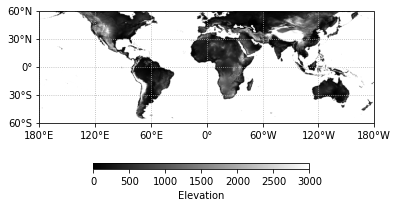

In [2]:
# get an earth engine image
srtm = ee.Image("CGIAR/SRTM90_V4")

region = [-180, -60, 180, 85]  # define bounding box to request data
vis = {'min': 0, 'max': 3000}  # define visualization parameters for image

# plot the result using cartoee
ax = cartoee.get_map(
    srtm, region=[-180, -60, 180, 60], vis_params={'min': 0, 'max': 3000}
)
cartoee.add_gridlines(ax, interval=(60, 30), linestyle=":")
cartoee.add_colorbar(
    ax,
    vis_params={'min': 0, 'max': 3000},
    loc="bottom",
    label="Elevation",
    orientation="horizontal",
)

# ax.coastlines() # adding coastlines are causing the errors!!!
plt.show()

In [37]:
Map = geemap.Map()
image = ee.Image('users/hoang28691/NDVI');
vis_params = {
    'min': 0.0,
    'max': 1.0,
    'palette': [
        'FFFFFF',
        'CE7E45',
        'DF923D',
        'F1B555',
        'FCD163',
        '99B718',
        '74A901',
        '66A000',
        '529400',
        '3E8601',
        '207401',
        '056201',
        '004C00',
        '023B01',
        '012E01',
        '011D01',
        '011301',
    ],
}
Map.addLayer(image, vis_params, 'NDVI')
AOI = ee.FeatureCollection('users/hoang28691/boundary_TTH')
style = {"color": "00000088", "width": 1, "fillColor": "00000000"}
Map.addLayer(AOI.style(**style), {}, "TTH")
ndvi = image.visualize(**vis_params)
blend = ndvi.blend(AOI.style(**style))

Map.addLayer(blend, {}, "Blend")

Map

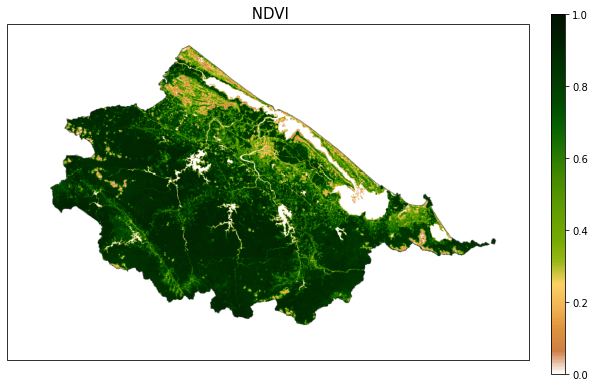

In [64]:
fig = plt.figure(figsize=(10, 10))
bbox = [106.9, 15.9, 108.3, 16.8]
ax = cartoee.get_map(blend, region=bbox)
cb = cartoee.add_colorbar(ax, vis_params=vis_params, loc='right')
ax.set_title(label=' NDVI', fontsize=15)
# ax.coastlines()
plt.show()